In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
whisky_data = pd.read_csv('data/whisky.csv')

In [3]:
whisky_data.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [4]:
data = whisky_data.iloc[:,2:14]
for col in data.columns:
    print(data[col].value_counts())


2    45
1    19
3    11
4     9
0     2
Name: Body, dtype: int64
2    44
3    29
1    10
4     3
Name: Sweetness, dtype: int64
1    45
2    28
3     5
4     4
0     4
Name: Smoky, dtype: int64
0    59
1    15
2     7
4     3
3     2
Name: Medicinal, dtype: int64
0    76
1    10
Name: Tobacco, dtype: int64
1    33
2    32
0    18
3     2
4     1
Name: Honey, dtype: int64
2    37
1    33
0    12
3     4
Name: Spicy, dtype: int64
1    37
0    29
2    15
3     3
4     2
Name: Winey, dtype: int64
2    43
1    27
0    12
3     3
4     1
Name: Nutty, dtype: int64
2    55
1    21
3     8
0     2
Name: Malty, dtype: int64
2    49
1    18
3    13
0     6
Name: Fruity, dtype: int64
2    49
1    19
0     9
3     7
4     2
Name: Floral, dtype: int64


In [17]:
whisky_data.describe()

,RowID,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,43.500000,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674,287247.162791,8.026597e+05
std,24.969982,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017,67889.046814,8.802422e+04
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126680.000000,5.542600e+05
25%,22.250000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,265672.500000,7.556975e+05
50%,43.500000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,319515.000000,8.398850e+05
75%,64.750000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,328630.000000,8.507700e+05
max,86.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,381020.000000,1.009260e+06


In [5]:
whisky_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
RowID         86 non-null int64
Distillery    86 non-null object
Body          86 non-null int64
Sweetness     86 non-null int64
Smoky         86 non-null int64
Medicinal     86 non-null int64
Tobacco       86 non-null int64
Honey         86 non-null int64
Spicy         86 non-null int64
Winey         86 non-null int64
Nutty         86 non-null int64
Malty         86 non-null int64
Fruity        86 non-null int64
Floral        86 non-null int64
Postcode      86 non-null object
Latitude      86 non-null int64
Longitude     86 non-null int64
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


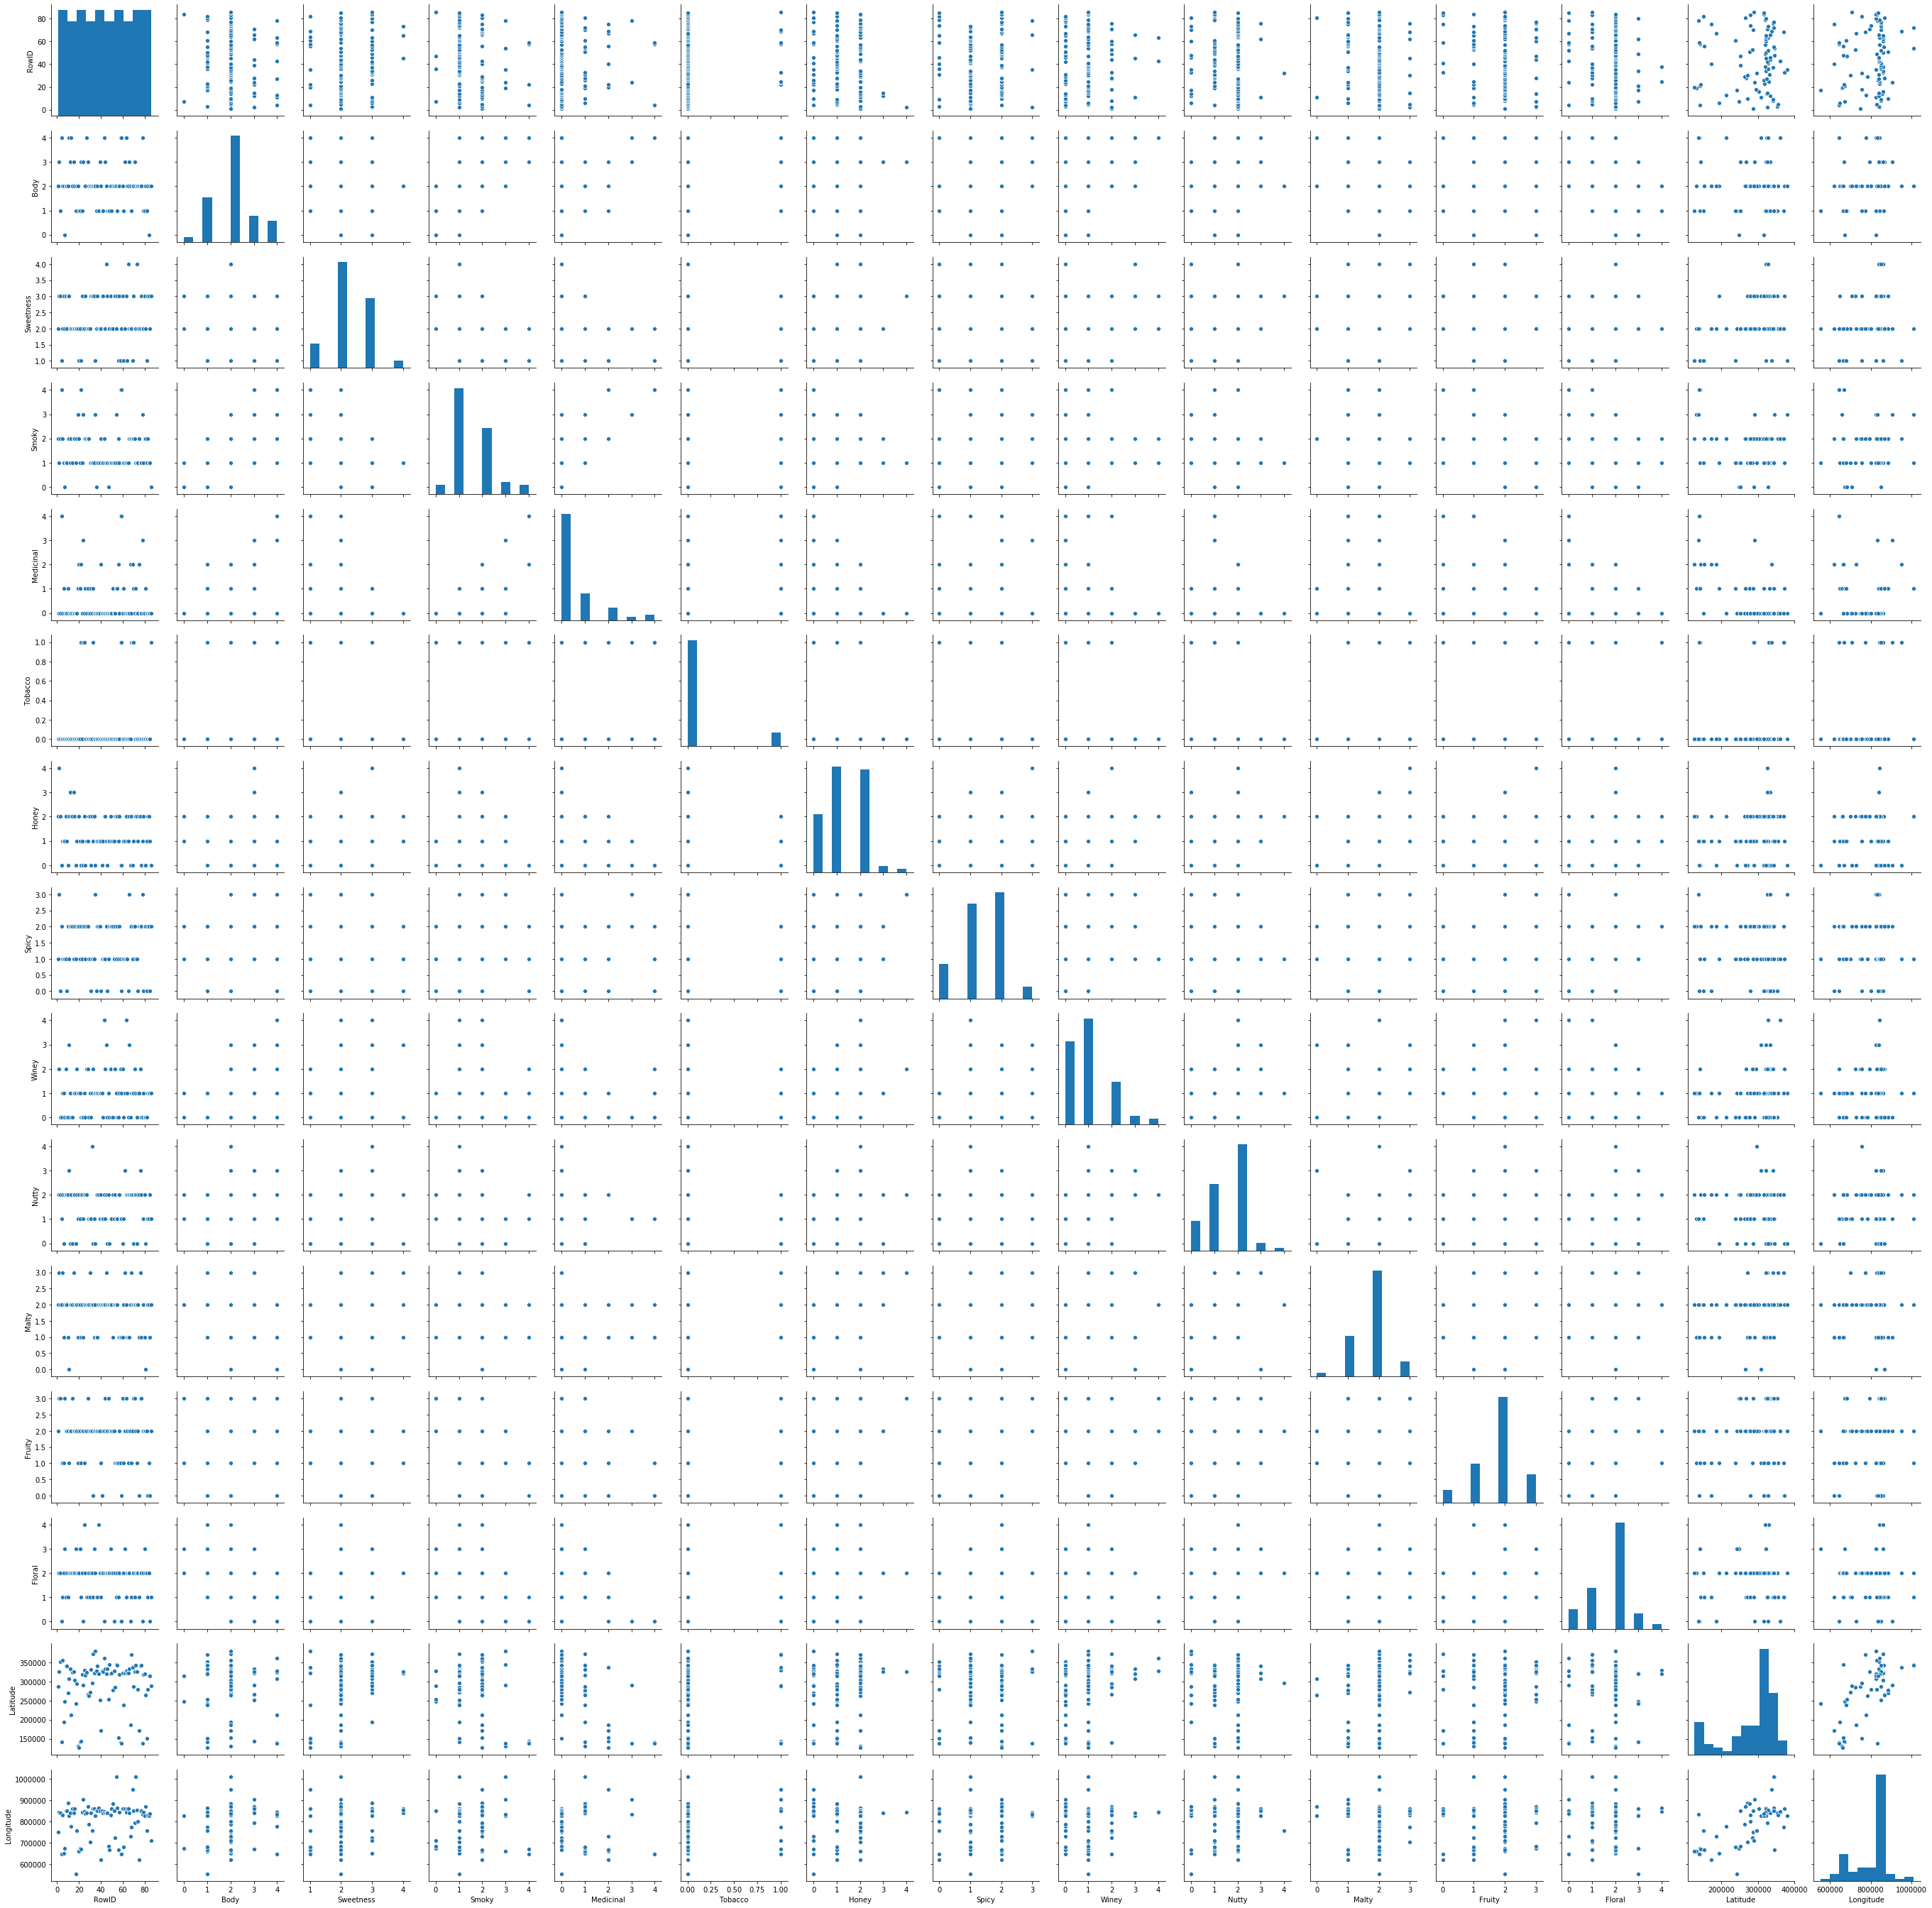

In [6]:
sns.pairplot(whisky_data)

In [7]:

whisky_data = whisky_data.drop('Postcode', axis=1)

In [24]:
X = whisky_data.iloc[:, 2:14].values
X

array([[2, 2, 2, ..., 2, 2, 2],
       [3, 3, 1, ..., 3, 3, 2],
       [1, 3, 2, ..., 2, 3, 2],
       ...,
       [0, 3, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 1, 0, 0],
       [2, 3, 0, ..., 2, 2, 1]], dtype=int64)

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [31]:
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

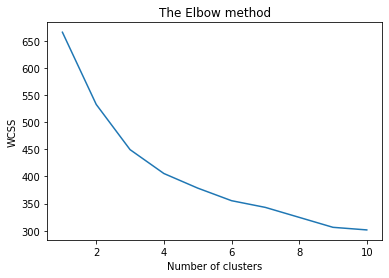

In [32]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(X)

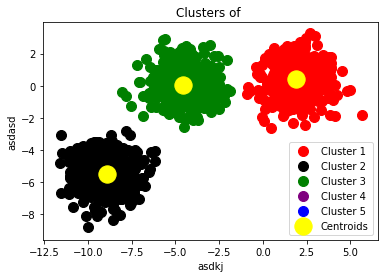

In [36]:
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1,1], s = 100, c = 'black', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3,1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4,1], s = 100, c = 'blue', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow',label = 'Centroids')
plt.title('Clusters of ')
plt.xlabel('asdkj')
plt.ylabel('asdasd')
plt.legend()
plt.show()

In [37]:
import scipy.cluster.hierarchy

In [14]:
help(scipy.cluster.hierarchy)

Help on module scipy.cluster.hierarchy in scipy.cluster:

NAME
    scipy.cluster.hierarchy

DESCRIPTION
    Hierarchical clustering (:mod:`scipy.cluster.hierarchy`)
    
    .. currentmodule:: scipy.cluster.hierarchy
    
    These functions cut hierarchical clusterings into flat clusterings
    or find the roots of the forest formed by a cut by providing the flat
    cluster ids of each observation.
    
    .. autosummary::
       :toctree: generated/
    
       fcluster
       fclusterdata
       leaders
    
    These are routines for agglomerative clustering.
    
    .. autosummary::
       :toctree: generated/
    
       linkage
       single
       complete
       average
       weighted
       centroid
       median
       ward
    
    These routines compute statistics on hierarchies.
    
    .. autosummary::
       :toctree: generated/
    
       cophenet
       from_mlab_linkage
       inconsistent
       maxinconsts
       maxdists
       maxRstat
       to_mlab_linkag